# Brazilian E-Commerce Public Dataset by Olist

# Introduction

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. It has also been included a geolocation dataset that relates Brazilian zip codes to Lat/Lng coordinates.

Olist is a Brazilian departmental store (marketplace) that operates in e-commerce segment, but is not an e-commerce itself. It operates as a SaaS (Software as a Service) technology company since 2015. It offers a marketplace solution (of e-commerce segment) to shopkeepers of all sizes (and for most segments) to increase their sales.

# required steps for our project 

**1. Install and import the required libraries**


**2. Download the Dataset**


**3. learning about the data and Data Cleaning**


**4. Perform Exploratory Analysis and Visualization**


**5. Conclusion**

**1. Install and import the required libraries**

In [1]:
# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import sidetable
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
from plotly.subplots import make_subplots

**2. Download the Dataset**

in this task we have diffrents datasources for each topic related to the ecommerce sales of the store.

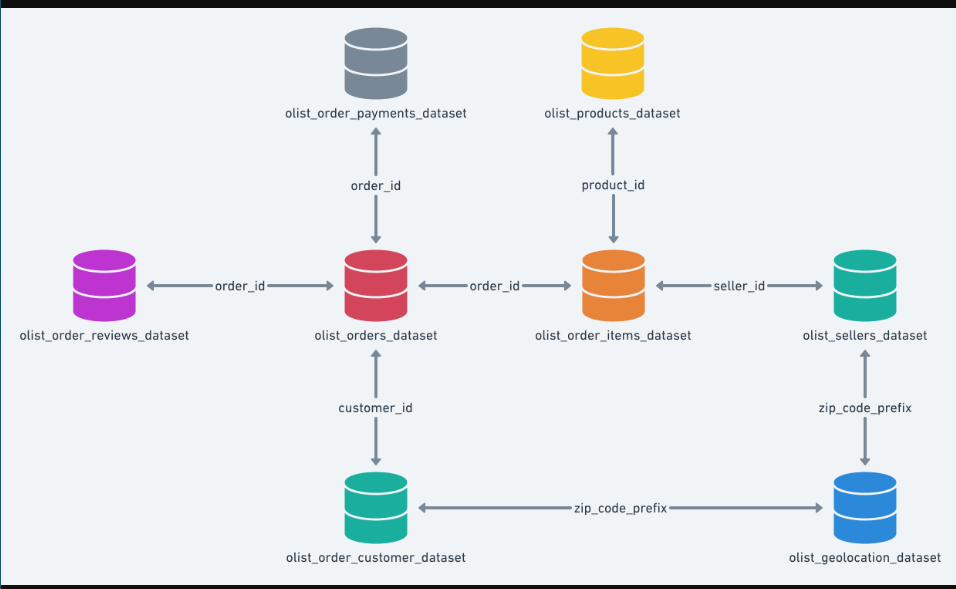

In [2]:
# Reading all the files
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

**3. learning about the data and Data Cleaning**

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
geolocation.shape

(1000163, 5)

In [6]:
geolocation.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [7]:
geolocation.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [8]:
geolocation['geolocation_city'].value_counts()

sao paulo                  135800
rio de janeiro              62151
belo horizonte              27805
são paulo                   24918
curitiba                    16593
                            ...  
cardeal                         1
pinhal da serra                 1
nova brasilandia doeste         1
mar vermelho                    1
santana do piauí                1
Name: geolocation_city, Length: 8011, dtype: int64

The five major cities in this data are Sao Paulo, Rio de Janeiro, Belo Horizonte, são Paulo, and Curitiba. Unfortunately, it looks like Sao Paulo and são Paulo are the same; Let's fix it.

In [9]:
geolocation.replace(to_replace='são paulo',value='sao paulo',inplace=True)
geolocation['geolocation_city'].value_counts()

sao paulo                  160718
rio de janeiro              62151
belo horizonte              27805
curitiba                    16593
porto alegre                13521
                            ...  
cardeal                         1
pinhal da serra                 1
nova brasilandia doeste         1
mar vermelho                    1
santana do piauí                1
Name: geolocation_city, Length: 8010, dtype: int64

In [10]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [13]:
orders.shape

(99441, 8)

In [14]:
orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,3d965a3a3a9aae822a8f40ddf0184df1,262f9e6567891bd8c5bcdfe9aaa67e4b,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


We will change the data type of our data frame orders; we will be changing it to date and time data type. It will help us to make the changes in our data frame.

In [16]:
orders['purchase_date'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [17]:
orders['year'] = pd.DatetimeIndex(orders['purchase_date']).year
orders['month'] = pd.DatetimeIndex(orders['purchase_date']).month
orders['day'] = pd.DatetimeIndex(orders['purchase_date']).day
orders['hour'] = pd.DatetimeIndex(orders['purchase_date']).hour

In [18]:
# Getting values for specific time of a day 
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Early morning', 'Morning', 'Afternoon', 'Night']
orders['order_purchase_time_day'] = pd.cut(orders['hour'], hours_bins, labels=hours_labels)
orders[:5]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,year,month,day,hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017,10,2,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018,7,24,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018,8,8,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017,11,18,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018,2,13,21,Night


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   purchase_date                  99441 non-null  datetime64[ns]
 9   year                           99441 non-null  int64         
 10  month                          99441 non-null  int64         
 11  day            

In [20]:
orders.describe(include='all')
warnings.filterwarnings("ignore")

<ipython-input-20-c2b65d4bdb1b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include='all')


In [21]:
orders.stb.missing()

,missing,total,percent
order_delivered_customer_date,2965,99441,2.981668
order_delivered_carrier_date,1783,99441,1.793023
order_approved_at,160,99441,0.160899
order_id,0,99441,0.000000
customer_id,0,99441,0.000000
order_status,0,99441,0.000000
order_purchase_timestamp,0,99441,0.000000
order_estimated_delivery_date,0,99441,0.000000
purchase_date,0,99441,0.000000
year,0,99441,0.000000


In [22]:
orders = orders.dropna()

In [23]:
orders.stb.missing()

,missing,total,percent
order_id,0,96461,0.0
customer_id,0,96461,0.0
order_status,0,96461,0.0
order_purchase_timestamp,0,96461,0.0
order_approved_at,0,96461,0.0
order_delivered_carrier_date,0,96461,0.0
order_delivered_customer_date,0,96461,0.0
order_estimated_delivery_date,0,96461,0.0
purchase_date,0,96461,0.0
year,0,96461,0.0


In [24]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
items.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [26]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [28]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [29]:
products.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [30]:
products.shape

(32951, 9)

In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
products.stb.missing()

,missing,total,percent
product_category_name,610,32951,1.851234
product_name_lenght,610,32951,1.851234
product_description_lenght,610,32951,1.851234
product_photos_qty,610,32951,1.851234
product_weight_g,2,32951,0.006070
product_length_cm,2,32951,0.006070
product_height_cm,2,32951,0.006070
product_width_cm,2,32951,0.006070
product_id,0,32951,0.000000


In [33]:
products = products.dropna()

In [34]:
products.stb.missing()

,missing,total,percent
product_id,0,32340,0.0
product_category_name,0,32340,0.0
product_name_lenght,0,32340,0.0
product_description_lenght,0,32340,0.0
product_photos_qty,0,32340,0.0
product_weight_g,0,32340,0.0
product_length_cm,0,32340,0.0
product_height_cm,0,32340,0.0
product_width_cm,0,32340,0.0


In [35]:
products.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4db7441d0d2cf3d22cb4d95f87d8bf63,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [36]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [37]:
sellers.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [38]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [39]:
sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,e24fc9fcd865784fb25705606fe3dfe7,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [40]:
sellers.shape

(3095, 4)

In [41]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [42]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [43]:
reviews.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [44]:
reviews.shape

(99224, 7)

In [45]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [46]:
reviews.stb.missing()

,missing,total,percent
review_comment_title,87656,99224,88.341530
review_comment_message,58247,99224,58.702532
review_id,0,99224,0.000000
order_id,0,99224,0.000000
review_score,0,99224,0.000000
review_creation_date,0,99224,0.000000
review_answer_timestamp,0,99224,0.000000


In [47]:
reviews.review_comment_title.value_counts()

Recomendo                  423
recomendo                  345
Bom                        293
super recomendo            270
Excelente                  248
                          ... 
GUSTAVO SANTOS               1
Produto levara 60 dias       1
confiável                    1
excelente compra             1
Produto riscado              1
Name: review_comment_title, Length: 4527, dtype: int64

In [48]:
reviews['review_comment_title'] = reviews['review_comment_title'].fillna("don't_have_a_review")
reviews['review_comment_message'] = reviews['review_comment_message'].fillna("don't_have_a_review")

In [49]:
reviews.stb.missing()

,missing,total,percent
review_id,0,99224,0.0
order_id,0,99224,0.0
review_score,0,99224,0.0
review_comment_title,0,99224,0.0
review_comment_message,0,99224,0.0
review_creation_date,0,99224,0.0
review_answer_timestamp,0,99224,0.0


Let's merge the tables into one data frame.

In [50]:
customer_order = pd.merge(customers, orders, on='customer_id', how='inner')
customer_order_items = pd.merge(customer_order, items, on='order_id', how='inner')
customer_order_items_products = pd.merge(customer_order_items, products, on='product_id', how='inner')
customer_order_items_products_sellers = pd.merge(customer_order_items_products, sellers, on='seller_id', how='inner')
customer_order_items_products_sellers_payments = pd.merge(customer_order_items_products_sellers, payments, on='order_id', how='inner')

In [51]:
customer_order_items_products_sellers_payments.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,2,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,7,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,10,137.58


In [52]:
customer_order_items_products_sellers_payments.rename(columns = {'seller_zip_code_prefix':'zip_code_prefix'}, inplace = True)

In [53]:
customer_order_items_products_sellers_payments.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,2,146.87


In [54]:
geolocation.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [55]:
geolocation.rename(columns = {'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [56]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   zip_code_prefix    1000163 non-null  int64  
 1   geolocation_lat    1000163 non-null  float64
 2   geolocation_lng    1000163 non-null  float64
 3   geolocation_city   1000163 non-null  object 
 4   geolocation_state  1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [57]:
customer_order_items_products_sellers_payments_geolocation = pd.merge(customer_order_items_products_sellers_payments, geolocation, on='zip_code_prefix', how='inner')

In [58]:
customer_order_items_products_sellers_payments_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,itaquaquecetuba,SP,1,credit_card,2,146.87,-23.482623,-46.374490,itaquaquecetuba,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,itaquaquecetuba,SP,1,credit_card,2,146.87,-23.489888,-46.372657,itaquaquecetuba,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,itaquaquecetuba,SP,1,credit_card,2,146.87,-23.483042,-46.374934,itaquaquecetuba,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,itaquaquecetuba,SP,1,credit_card,2,146.87,-23.479473,-46.360819,itaquaquecetuba,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,itaquaquecetuba,SP,1,credit_card,2,146.87,-23.489348,-46.361394,itaquaquecetuba,SP


In [59]:
customer_order_items_products_sellers_payments_geolocation.shape

(16370666, 43)

In [60]:
merged_data = pd.merge(customer_order_items_products_sellers_payments_geolocation, reviews, on='order_id', how='inner')

In [61]:
merged_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,-23.482623,-46.374490,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4,don't_have_a_review,don't_have_a_review,2017-05-26 00:00:00,2017-05-30 22:34:40
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,-23.489888,-46.372657,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4,don't_have_a_review,don't_have_a_review,2017-05-26 00:00:00,2017-05-30 22:34:40
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,-23.483042,-46.374934,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4,don't_have_a_review,don't_have_a_review,2017-05-26 00:00:00,2017-05-30 22:34:40
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,-23.479473,-46.360819,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4,don't_have_a_review,don't_have_a_review,2017-05-26 00:00:00,2017-05-30 22:34:40
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,-23.489348,-46.361394,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4,don't_have_a_review,don't_have_a_review,2017-05-26 00:00:00,2017-05-30 22:34:40


In [62]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16367248 entries, 0 to 16367247
Data columns (total 49 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   customer_id                    object        
 1   customer_unique_id             object        
 2   customer_zip_code_prefix       int64         
 3   customer_city                  object        
 4   customer_state                 object        
 5   order_id                       object        
 6   order_status                   object        
 7   order_purchase_timestamp       object        
 8   order_approved_at              object        
 9   order_delivered_carrier_date   object        
 10  order_delivered_customer_date  object        
 11  order_estimated_delivery_date  object        
 12  purchase_date                  datetime64[ns]
 13  year                           int64         
 14  month                          int64         
 15  day          

In [63]:
merged_data.shape

(16367248, 49)

Ok, we merged all the data sources with an inner merged. So let's take only the data we want for the task and start exploring and find something interesting.

In [64]:
new_data = merged_data[['customer_id', 'customer_city', 'order_id', 'order_status', 'purchase_date', 'year', 'month', 'day', 'hour', 'order_purchase_time_day', 'price']]
new_data.head()

,customer_id,customer_city,order_id,order_status,purchase_date,year,month,day,hour,order_purchase_time_day,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017,5,16,15,Afternoon,124.99
1,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017,5,16,15,Afternoon,124.99
2,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017,5,16,15,Afternoon,124.99
3,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017,5,16,15,Afternoon,124.99
4,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017,5,16,15,Afternoon,124.99


In [65]:
new_data.shape

(16367248, 11)

In [66]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16367248 entries, 0 to 16367247
Data columns (total 11 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_id              object        
 1   customer_city            object        
 2   order_id                 object        
 3   order_status             object        
 4   purchase_date            datetime64[ns]
 5   year                     int64         
 6   month                    int64         
 7   day                      int64         
 8   hour                     int64         
 9   order_purchase_time_day  category      
 10  price                    float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 1.4+ GB


In [67]:
new_data.stb.missing()

,missing,total,percent
customer_id,0,16367248,0.0
customer_city,0,16367248,0.0
order_id,0,16367248,0.0
order_status,0,16367248,0.0
purchase_date,0,16367248,0.0
year,0,16367248,0.0
month,0,16367248,0.0
day,0,16367248,0.0
hour,0,16367248,0.0
order_purchase_time_day,0,16367248,0.0


In [68]:
new_data.describe(include='all')

,customer_id,customer_city,order_id,order_status,purchase_date,year,month,day,hour,order_purchase_time_day,price
count,16367248,16367248,16367248,16367248,16367248,1.636725e+07,1.636725e+07,1.636725e+07,1.636725e+07,16367248,1.636725e+07
unique,94278,4066,94278,2,93783,NaN,NaN,NaN,NaN,4,NaN
top,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,NaN,NaN,NaN,NaN,Afternoon,NaN
freq,7436,2611131,7436,16366028,7436,NaN,NaN,NaN,NaN,6274975,NaN
first,NaN,NaN,NaN,NaN,2016-10-03 09:44:50,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.017518e+03,6.099677e+00,1.556447e+01,1.476686e+01,NaN,1.174489e+02
std,NaN,NaN,NaN,NaN,NaN,5.057545e-01,3.219172e+00,8.689528e+00,5.344224e+00,NaN,1.712614e+02
min,NaN,NaN,NaN,NaN,NaN,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,NaN,8.500000e-01
25%,NaN,NaN,NaN,NaN,NaN,2.017000e+03,3.000000e+00,8.000000e+00,1.100000e+01,NaN,4.000000e+01


**4. Perform Exploratory Analysis and Visualization**

What are the top 10 cities in in terms of orders?

In [72]:
top_15_cities_orders = new_data.groupby(['customer_city'])['order_id'].nunique().reset_index()

In [73]:
top_10_cities_orders=top_15_cities_orders.sort_values(by='order_id', ascending=False).head(10).reset_index()
top_10_cities_orders

,index,customer_city,order_id
0,3547,sao paulo,14682
1,3113,rio de janeiro,6407
2,446,belo horizonte,2627
3,550,brasilia,2028
4,1131,curitiba,1462
5,697,campinas,1375
6,2924,porto alegre,1312
7,3205,salvador,1152
8,1513,guarulhos,1118
9,3385,sao bernardo do campo,889


In [74]:
fig = px.bar(top_10_cities_orders, x='customer_city', y='order_id', title='Top 10 cities with most orders', labels={'customer_city': 'City', 'order_id': 'Num of orders'})
fig.show()

It looks like Sao Paulo is the leading city in terms of orders. Rio de Janeiro is in second place.

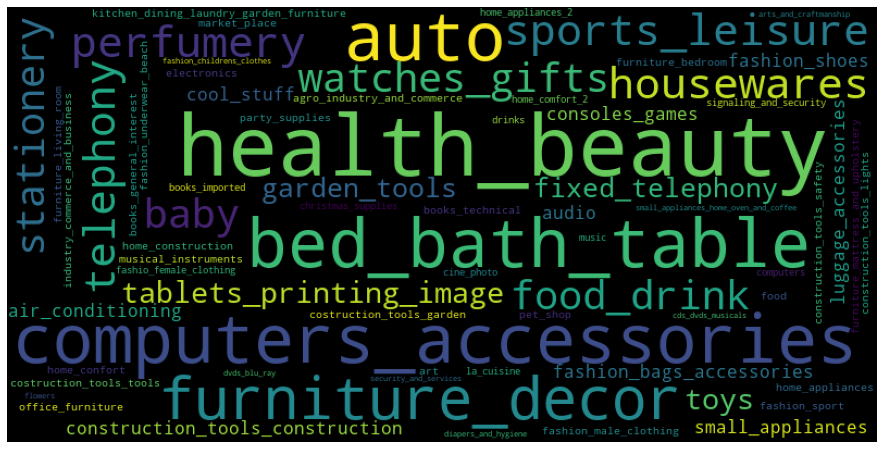

In [75]:
words = ' '.join((i for i in product_category.product_category_name_english.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);


If we look at the category with the most amount of product, health_beauty and computer_accessories are the top categories.

What is the status of orders around the course of 2 years?

In [76]:
all_count = orders.order_status.value_counts().sum()
status = orders.order_status.value_counts().to_frame()
status['Percentage'] = round((orders.order_status.value_counts() / all_count) *100,3)

In [77]:
fig = px.pie(status,
             values='Percentage',
             names=status.index,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title='Order status',
             hover_data=['order_status'])
fig.update_traces( textinfo='percent+label')
fig.update_layout(uniformtext_minsize=18)
fig.show()

Almost all orders are delivered during the two years in our data.


What was the best year in terms of orders?

In [78]:
order_year = orders.groupby(['year'])['order_id'].nunique().reset_index()
order_year.head()

,year,order_id
0,2016,272
1,2017,43411
2,2018,52778


In [79]:
fig = px.bar(order_year, x='year', y='order_id', title='Top year by orders', labels={'year': 'Year', 'order_id': 'Num of orders'})
fig.show()

In 2016 there were 272 orders; in 2017, there were 41,400 orders, and in 2018 there were 52,778 orders.


What is the top hour by order?

In [80]:
order_hour = orders.groupby(['hour'])['order_id'].nunique().reset_index()
order_hour.head()

,hour,order_id
0,0,2322
1,1,1132
2,2,496
3,3,259
4,4,203


In [81]:
fig = px.bar(order_hour, x='hour', y='order_id', title='Top Hour by orders', labels={'hour': 'Hour', 'order_id': 'Num of orders'})
fig.show()

It looks like that between 10 AM to 10 PM is the hours with most amounts of orders.

What is the top time of the day in terms of orders?

In [82]:
order_time_day = orders.groupby(['order_purchase_time_day'])['order_id'].nunique().reset_index()
order_time_day.head()

,order_purchase_time_day,order_id
0,Early morning,5071
1,Morning,26914
2,Afternoon,36956
3,Night,27520


In [83]:
fig = px.bar(order_time_day, x='order_purchase_time_day', y='order_id', title='Top time of the day by orders', labels={'order_purchase_time_day': 'time of day', 'order_id': 'Num of orders'})
fig.show()

The afternoon is the best time to purchase the website.

Let's look at the customer's shopping patterns under the weels of the Olist ecosystem. 

In [84]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [85]:
orders['order_approved_day'] = orders['order_approved_at'].dt.day_name()
orders['purchase_date_day'] = orders['purchase_date'].dt.day_name()
orders['order_delivered_day'] = orders['order_delivered_customer_date'].dt.day_name()
orders['order_estimated_delivery_day'] = orders['order_estimated_delivery_date'].dt.day_name()

In [86]:
order_approved_day_order = orders.groupby('order_approved_day')['order_id'].nunique().reset_index()
purchase_date_day_order = orders.groupby('purchase_date_day')['order_id'].nunique().reset_index()
order_delivered_day_order = orders.groupby('order_delivered_day')['order_id'].nunique().reset_index()
order_estimated_delivery_day_order = orders.groupby('order_estimated_delivery_day')['order_id'].nunique().reset_index()

In [87]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Order approved',
                                   'Order purchased',
                                   'Order delivered',
                                   'Order estimated delivery'])

fig.add_trace(go.Bar(x=order_approved_day_order['order_approved_day'],
                    y=order_approved_day_order['order_id']),row=1, col=1)
             
fig.add_trace(go.Bar(x=purchase_date_day_order['purchase_date_day'],
                    y=purchase_date_day_order['order_id']),row=1, col=2)

fig.add_trace(go.Bar(x=order_delivered_day_order['order_delivered_day'],
                    y=order_delivered_day_order['order_id']),row=2, col=1)

fig.add_trace(go.Bar(x=order_estimated_delivery_day_order['order_estimated_delivery_day'],
                    y=order_estimated_delivery_day_order['order_id']),row=2, col=2)

fig.update_layout(height=600, width=600, title_text="Shopping patterns of Olist customers", showlegend=False)

fig.show()

From an order purchase perspective, the best time to make an order is on Mondays. Saturdays and Sundays are weaker days compared to other days.
An order delivered on Mondays is the most common day a customer gets his product.


In [88]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,year,month,day,hour,order_purchase_time_day,order_approved_day,purchase_date_day,order_delivered_day,order_estimated_delivery_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02 10:56:33,2017,10,2,10,Morning,Monday,Monday,Tuesday,Wednesday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24 20:41:37,2018,7,24,20,Night,Thursday,Tuesday,Tuesday,Monday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08 08:38:49,2018,8,8,8,Morning,Wednesday,Wednesday,Friday,Tuesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18 19:28:06,2017,11,18,19,Night,Saturday,Saturday,Saturday,Friday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13 21:18:39,2018,2,13,21,Night,Tuesday,Tuesday,Friday,Monday


In [89]:
orders['month_year'] = orders['order_purchase_timestamp'].astype('datetime64[M]')

In [90]:
month_year_orders = orders.groupby(['month_year'])['order_id'].nunique().reset_index()

In [91]:
month_year_orders.head()

,month_year,order_id
0,2016-09-01,1
1,2016-10-01,270
2,2016-12-01,1
3,2017-01-01,748
4,2017-02-01,1641


In [92]:
fig = px.line(month_year_orders, x='month_year', y="order_id")
fig.show()

Looking at orders over time, we can see that 2018 was the best year in order amount.
But in terms of growth, 2017 was better. The best month of order growth was Oct 2017, with 2810 orders.


In [93]:
orders['order_year'] = orders['order_purchase_timestamp'].astype('datetime64[Y]')
year_orders = orders.groupby(['order_year'])['order_id'].nunique().reset_index()


In [94]:
fig = px.line(year_orders, x='order_year', y="order_id")
fig.show()

Here we can see the growth of 2017 much better.


In [95]:
orders['time_to_delivery'] = (orders['order_delivered_customer_date'] - orders['purchase_date'])

In [128]:
orders['time_to_delivery'].mean()

Timedelta('12 days 13:23:46.585853350')

The avg. time for an order to get delivered from when a customer purchased the order to reach its destination successfully is 12 days and 13 hours.

Let's create a corralation heatmap for our merged data

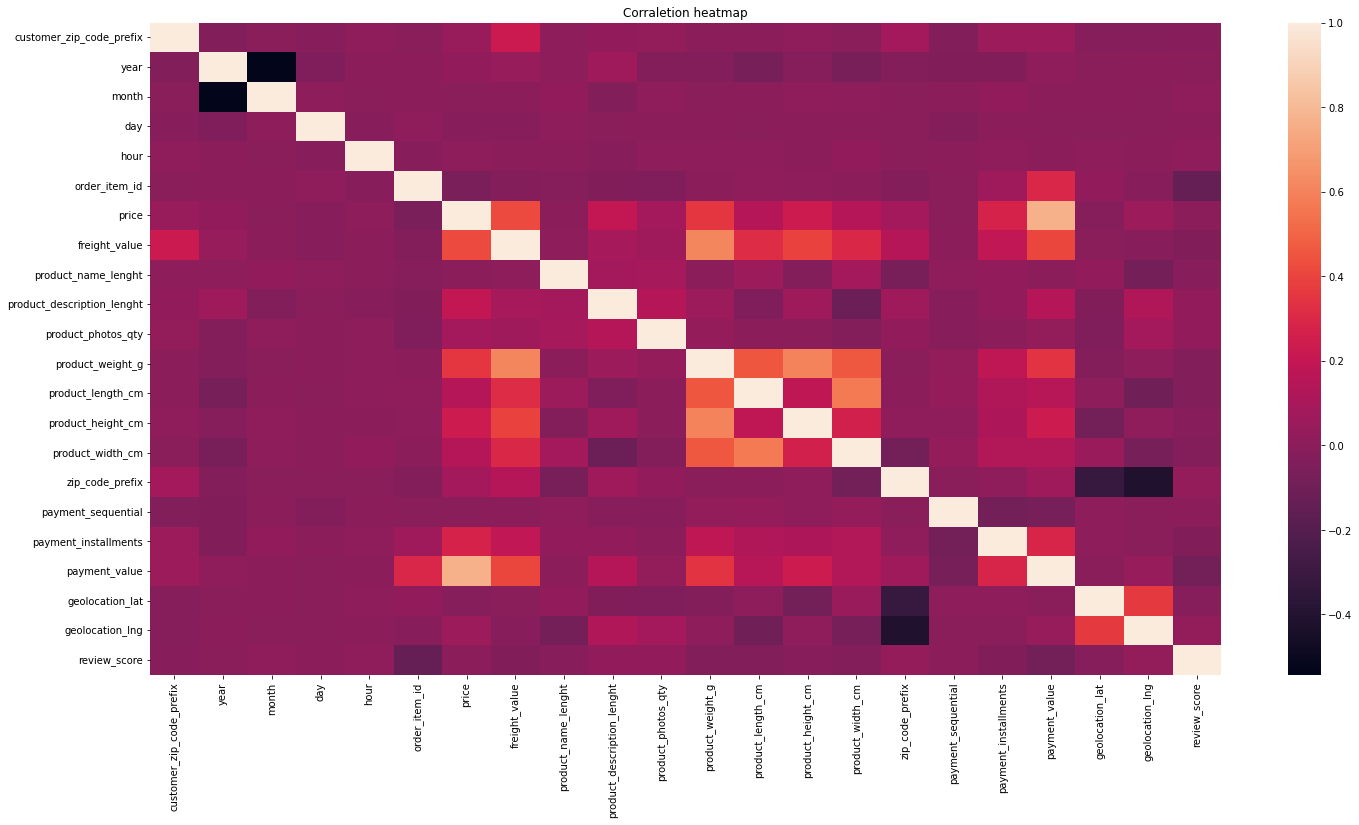

In [96]:
plt.figure(figsize=(24,12))

corr_data = merged_data.corr()

sns.heatmap(corr_data)
plt.title('Corraletion heatmap')
plt.show()

In [98]:
corr_data.sort_values('price', ascending=False)

,customer_zip_code_prefix,year,month,day,hour,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix,payment_sequential,payment_installments,payment_value,geolocation_lat,geolocation_lng,review_score
price,0.045130,0.019797,-0.009944,-0.012825,0.009544,-0.063637,1.000000,0.421021,0.005070,0.193948,...,0.139162,0.228932,0.147819,0.085290,-0.006687,0.272915,0.765275,-0.024551,0.055073,0.000938
payment_value,0.058184,0.013434,0.001704,-0.007711,-0.005310,0.290922,0.765275,0.406029,-0.004755,0.144605,...,0.152293,0.231466,0.136942,0.069281,-0.072917,0.288383,1.000000,-0.008324,0.041415,-0.090052
freight_value,0.225805,0.040107,0.001737,-0.016488,0.004080,-0.030414,0.421021,1.000000,0.008132,0.090367,...,0.314495,0.394344,0.297199,0.141548,0.002768,0.189421,0.406029,-0.006575,-0.013290,-0.039610
product_weight_g,0.002418,-0.025866,-0.011225,-0.000785,0.008418,-0.001449,0.352820,0.608797,0.000535,0.054758,...,0.453477,0.597216,0.461172,-0.010047,0.027506,0.183740,0.341165,-0.027271,0.009278,-0.034199
payment_installments,0.057234,-0.042382,0.021256,0.005126,0.014858,0.065793,0.272915,0.189421,0.018120,0.023524,...,0.130723,0.114768,0.134838,0.013873,-0.089110,1.000000,0.288383,0.009074,-0.008787,-0.042696
product_height_cm,0.016305,-0.023096,0.012457,0.001379,-0.000870,0.007075,0.228932,0.394344,-0.027315,0.071382,...,0.184520,1.000000,0.263385,0.014624,0.017467,0.114768,0.231466,-0.088973,0.013809,-0.017820
product_description_lenght,0.020054,0.061928,-0.030895,-0.009908,-0.012621,-0.037006,0.193948,0.090367,0.078770,1.000000,...,-0.046014,0.071382,-0.118756,0.064801,-0.014064,0.023524,0.144605,-0.039093,0.125359,0.023395
product_width_cm,-0.010576,-0.067682,0.011167,0.004524,0.018018,-0.004609,0.147819,0.297199,0.082627,-0.118756,...,0.571449,0.263385,1.000000,-0.087687,0.031264,0.134838,0.136942,0.053419,-0.077299,-0.026499
product_length_cm,0.000437,-0.077823,0.004282,-0.009183,0.009501,0.013383,0.139162,0.314495,0.058284,-0.046014,...,1.000000,0.184520,0.571449,-0.001661,0.031528,0.130723,0.152293,0.006469,-0.102948,-0.035796
zip_code_prefix,0.087970,-0.025422,-0.011562,-0.008499,-0.008029,-0.028658,0.085290,0.141548,-0.071758,0.064801,...,-0.001661,0.014624,-0.087687,1.000000,-0.010782,0.013873,0.069281,-0.315051,-0.413344,0.034658


A logical correlation with the price is that the product weight correlates to 0.35. the freight_value also correlates to 0.42, and the payment_value correlates 0.76.

# **5. Conclusion**

Some conclusion we can take from this analysis is that:

- san Paulo and Rio are the top cities in terms of orders, but san Paulo is number 1 by a mile.


- Health and beauty is the category with the most amount of products.


- 2018 was a better year in terms of the order amount, but 2017 was better in order growth.


- The best hours in terms of orders were between 11 to 16.


- if we grouped the day to four seperate times, the afternoon is a better time to make an order from the mornings.


- From an order purchase perspective, the best time to make an order is on Mondays. Saturdays and Sundays are weaker days compared to other days.


- An order delivered on Mondays is the most common day a customer gets his product.